## Random Forests

Random Forest is one of the most popular and commonly used algorithms by Data Scientists. Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

### Decision Trees

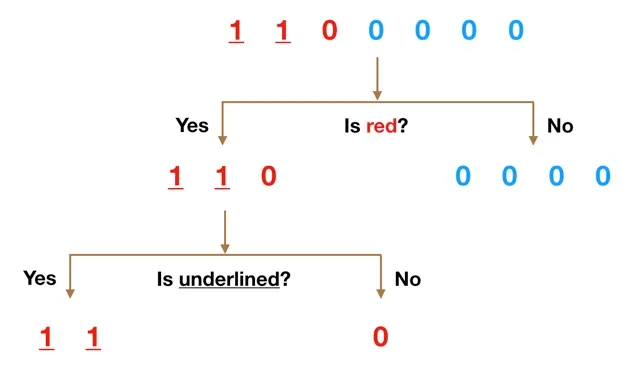

Imagine that our dataset consists of the numbers at the top of the figure to the left. We have two 1s and five 0s (1s and 0s are our classes) and desire to separate the classes using their features. The features are color (red vs. blue) and whether the observation is underlined or not. So how can we do this?

Color seems like a pretty obvious feature to split by as all but one of the 0s are blue. So we can use the question, “Is it red?” to split our first node. You can think of a node in a tree as the point where the path splits into two — observations that meet the criteria go down the Yes branch and ones that don’t go down the No branch.

The No branch (the blues) is all 0s now so we are done there, but our Yes branch can still be split further. Now we can use the second feature and ask, “Is it underlined?” to make a second split.

The two 1s that are underlined go down the Yes subbranch and the 0 that is not underlined goes down the right subbranch and we are all done. Our decision tree was able to use the two features to split up the data perfectly.
[1]

### Random Forest Classifier

Random Forests consist of a large number of decision trees that operate as an ensemble. Each tree produces a class prediction, the class with the most votes becomes the models prediction.

"A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models."

Low correlation between models results in an effect where trees protect each other from their individual errors.

For a random forest to perform well it must:
 - Have an actual signal in the features so that the models built using those features do better than random guessing
 - Predictions (and errors) made by individuals need low correlations with each other

### Ensuring Model Diversification

To ensure low correlation two methods are used:

__Bagging (Bootsrap Aggregation)__ - _Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures_. Each tree randomly samples from the dataset with replacement, resulting in different trees.

With bagging we are not subsetting the training data into smaller chunks and training each tree on a different chunk. Rather, if we have a sample of size N, we are still feeding each tree a training set of size N. But instead of the original training data, we take a random sample of size N with replacement. For example, if our training data was [1, 2, 3, 4, 5, 6] then we might give one of our trees the following list [1, 2, 2, 3, 6, 6]. Notice that both lists are of length six and that “2” and “6” are both repeated in the randomly selected training data we give to our tree (because we sample with replacement).

__Feature Randomness__ - In a Random Forest each tree can pick only from a random subset of features, forcing even more variation resulting in lower correlation across trees.


## Identify Hand Written Digits

Place into 10 different classes (0 through 9).

In [1]:
import pandas as pd
from sklearn.datasets import load_digits #dataset
digits = load_digits()

In [2]:
dir(digits) # return properties and methods of object

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Tells us we have the actual data, feature names, target data and target names.

<Figure size 432x288 with 0 Axes>

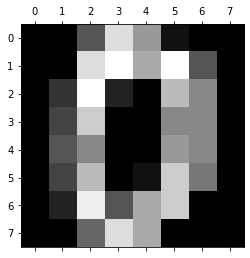

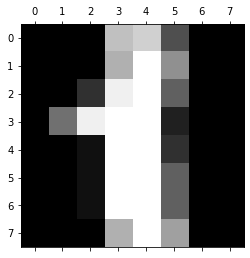

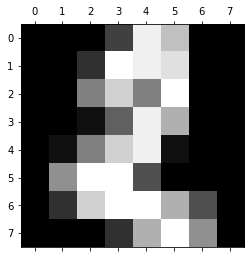

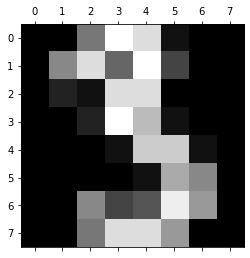

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i]) #show first 4 images

In [6]:
df = pd.DataFrame(digits.data)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


We have a row of 64 integers per values (64 pixels in an 8 by 8 image). Integers represent 'colour' of each pixel.

In [7]:
df['target'] = digits.target
df.head(3)
#show target value

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [9]:
#split training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis = 'columns'), digits.target, test_size = 0.2)
#'test_size=0.2' allocates 20% of data to testing and 80% to training

In [10]:
len(x_test)

360

In [16]:
#build multiple decision trees and taking majority vote
from sklearn.ensemble import RandomForestClassifier
#training step
model = RandomForestClassifier(n_estimators = 30)
#can adjust n_estimators to improve accuracy
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30)

In [12]:
model.score(x_test, y_test)

0.9611111111111111

In [13]:
#accuracy was 96%
y_predicted = model.predict(x_test)

#### Confusion Matrix

Table used in classification problems to assess where errors in the model were made. Rows represent actual classes the outcomes should have been, columns represent the predictions made.  

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 36,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 32,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  0, 30]], dtype=int64)

Text(69.0, 0.5, 'Truth')

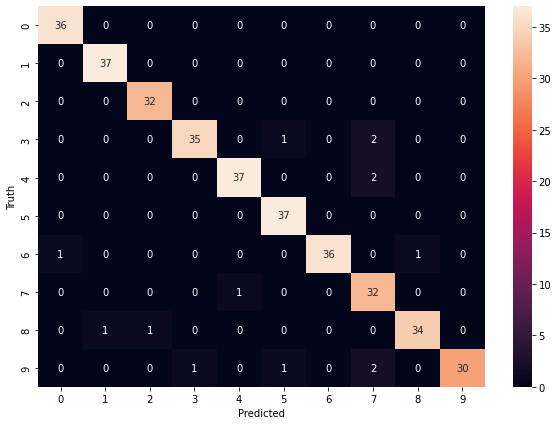

In [20]:
#visualising the errors
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Interpreting Data

The value from Trurh 0 and predicted 0 is 36, meaning 36 times the model predicted zero it was correct.

### Predicting Flower Species

We will now predict flower species from the iris flower dataset in sklearn.

__Iris Flower Dataset__

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [73]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
list(iris_data.target_names)

['setosa', 'versicolor', 'virginica']

In [74]:
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [75]:
list(iris_data.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [76]:
iris_df = pd.DataFrame(iris_data.data)
iris_df.head(3)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


4 columns denote: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [77]:
#split training and test data
from sklearn.model_selection import train_test_split
xi_train, xi_test, yi_train, yi_test = train_test_split(iris_df, iris_data.target, test_size = 0.2)

In [54]:
xi_train

,0,1,2,3,target
107,7.3,2.9,6.3,1.8,2
45,4.8,3.0,1.4,0.3,0
13,4.3,3.0,1.1,0.1,0
55,5.7,2.8,4.5,1.3,1
9,4.9,3.1,1.5,0.1,0
...,...,...,...,...,...
75,6.6,3.0,4.4,1.4,1
8,4.4,2.9,1.4,0.2,0
63,6.1,2.9,4.7,1.4,1
115,6.4,3.2,5.3,2.3,2


In [78]:
from sklearn.ensemble import RandomForestClassifier
iris_model = RandomForestClassifier(n_estimators = 10)
iris_model.fit(xi_train, yi_train)

RandomForestClassifier(n_estimators=10)

In [79]:
iris_model.score(xi_test, yi_test)

0.8666666666666667

We obtain 86% accuracy with 10 n_estimators

In [86]:
iris_model = RandomForestClassifier(n_estimators = 11)
iris_model.fit(xi_train, yi_train)
iris_model.score(xi_test, yi_test)

0.9

Highest obtainable accuracy is 90% with 11 n_estimators

#### References
[1] - https://towardsdatascience.com/understanding-random-forest-58381e0602d2

[2] - https://www.youtube.com/watch?v=ok2s1vV9XW0